# **EmotiSense: A Deep Learning Approach to Speech Emotion Recognition**

This project aims to automatically recognize emotions from speech signals using different model approaches. This project is useful in various applications, such as mental health diagnosis, human-robot interaction, and speech-based emotion recognition in social media.

## Project Team Members



*   Apoorva Ganapati (ag8159)
*   Tanvi Saini (ts4175)



## Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import os
import sys

In [2]:
import librosa
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# For playing the audio files
from IPython.display import Audio

In [162]:
# For Encoding, Train-Test Split, and Confusion Matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [291]:
# For using the Sequential Models
import keras
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, GRU, Reshape, LSTM
from keras.utils import np_utils, to_categorical
from keras.optimizers import Adam

In [35]:
# For ignoring warnings
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Data Import and Preprocessing

### Dataset Paths

In [7]:
#All four of our datasets are stored in a folder named 'EmotiSense'
Cremad = 'EmotiSense/cremad/AudioWAV/'
Ravdess = 'EmotiSense/ravdess-emotional-speech-audio/audio_speech_actors_01-24/'
Savee = 'EmotiSense/surrey-audiovisual-expressed-emotion-savee/ALL/'
Tess = 'EmotiSense/TESS Toronto emotional speech set data/'

### Dataset 1- Crema-D: Crowd-sourced Emotional Mutimodal Actors Dataset


Dataset link: https://github.com/CheyneyComputerScience/CREMA-D

In [10]:
# Data preprocessing and storing in a dataframe
cremad_dir = os.listdir(Cremad)

file_emotion = []
file_path = []

for file in cremad_dir:
    file_path.append(Cremad + file)
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# Creating a dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# Creating another dataframe for path of files
path_df = pd.DataFrame(file_path, columns=['Path'])

#Combining emotion and path dataframes
Cremad_df = pd.concat([emotion_df, path_df], axis=1)
Cremad_df.head()

Emotions                                            Path
0    angry  EmotiSense/cremad/AudioWAV/1022_ITS_ANG_XX.wav
1    angry  EmotiSense/cremad/AudioWAV/1037_ITS_ANG_XX.wav
2  neutral  EmotiSense/cremad/AudioWAV/1060_ITS_NEU_XX.wav
3  neutral  EmotiSense/cremad/AudioWAV/1075_ITS_NEU_XX.wav
4  disgust  EmotiSense/cremad/AudioWAV/1073_IOM_DIS_XX.wav

### Dataset 2- Ravdess: Ryerson Audio-Visual Database of Emotional Speech and Song

Dataset link: https://zenodo.org/record/3255102#.ZD300S_MIdA

In [11]:
# Data preprocessing and storing in a dataframe
ravdess_dir = os.listdir(Ravdess)

file_emotion = []
file_path = []

for dir in ravdess_dir:
    # Extracting files for each actor
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # The third part in each file represents the emotion associated to that file
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
# Creating a dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# Creating another dataframe for path of files
path_df = pd.DataFrame(file_path, columns=['Path'])

#Combining emotion and path dataframes
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# Mapping integers to actual emotions
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

Emotions                                               Path
0    angry  EmotiSense/ravdess-emotional-speech-audio/audi...
1     fear  EmotiSense/ravdess-emotional-speech-audio/audi...
2     fear  EmotiSense/ravdess-emotional-speech-audio/audi...
3    angry  EmotiSense/ravdess-emotional-speech-audio/audi...
4  disgust  EmotiSense/ravdess-emotional-speech-audio/audi...

### Dataset 3- Savee: Surrey Audio-Visual Expressed Emotion

Dataset link: https://tspace.library.utoronto.ca/handle/1807/24487

In [12]:
# Data preprocessing and storing in a dataframe
savee_dir = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_dir:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# Creating a dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# Creating another dataframe for path of files
path_df = pd.DataFrame(file_path, columns=['Path'])

#Combining emotion and path dataframes
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

Emotions                                               Path
0       sad  EmotiSense/surrey-audiovisual-expressed-emotio...
1       sad  EmotiSense/surrey-audiovisual-expressed-emotio...
2   neutral  EmotiSense/surrey-audiovisual-expressed-emotio...
3  surprise  EmotiSense/surrey-audiovisual-expressed-emotio...
4   neutral  EmotiSense/surrey-audiovisual-expressed-emotio...

### Dataset 4- Tess: Toronto emotional speech set

Dataset link: http://kahlan.eps.surrey.ac.uk/savee/

In [13]:
# Data preprocessing and storing in a dataframe
tess_dir = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_dir:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)
        
# Creating a dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# Creating another dataframe for path of files
path_df = pd.DataFrame(file_path, columns=['Path'])

#Combining emotion and path dataframes
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

Emotions                                               Path
0  disgust  EmotiSense/TESS Toronto emotional speech set d...
1  disgust  EmotiSense/TESS Toronto emotional speech set d...
2  disgust  EmotiSense/TESS Toronto emotional speech set d...
3  disgust  EmotiSense/TESS Toronto emotional speech set d...
4  disgust  EmotiSense/TESS Toronto emotional speech set d...

### Combining all Datasets

In [14]:
# Creating a single dataframe combining all the 4 dataframes above
combined_df = pd.concat([Ravdess_df, Cremad_df, Tess_df, Savee_df], axis = 0)

#Saving the combined dataframe
combined_df.to_csv('combined_data.csv',index=False)
combined_df.head()

Emotions                                               Path
0    angry  EmotiSense/ravdess-emotional-speech-audio/audi...
1     fear  EmotiSense/ravdess-emotional-speech-audio/audi...
2     fear  EmotiSense/ravdess-emotional-speech-audio/audi...
3    angry  EmotiSense/ravdess-emotional-speech-audio/audi...
4  disgust  EmotiSense/ravdess-emotional-speech-audio/audi...

## Explanatory Data Analysis

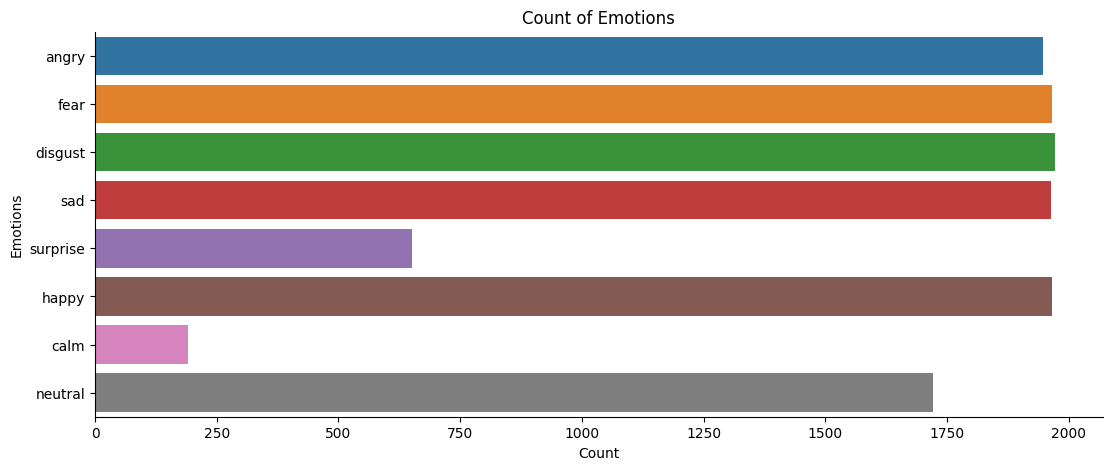

In [153]:
# Plotting the count of each emotions in our combined dataset
plt.figure(figsize=(13, 5))
plt.title('Count of Emotions')
sns.countplot(y=combined_df['Emotions'])
plt.ylabel('Emotions')
plt.xlabel('Count')
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [16]:
# Defining functions for creating waveplots and spectrograms
def create_waveplot(data, sr, e):
    plt.figure(figsize=(12, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(13, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

def display_the_plots(emotion):
  path = np.array(combined_df.Path[combined_df.Emotions==emotion])[1]
  data, sampling_rate = librosa.load(path)
  create_waveplot(data, sampling_rate, emotion)
  create_spectrogram(data, sampling_rate, emotion)
  Audio(path)

**Plotting graphs for some emotions**

1. Fear

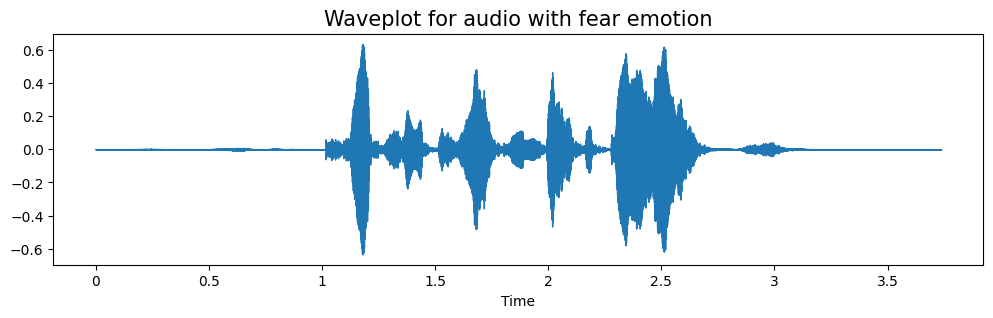

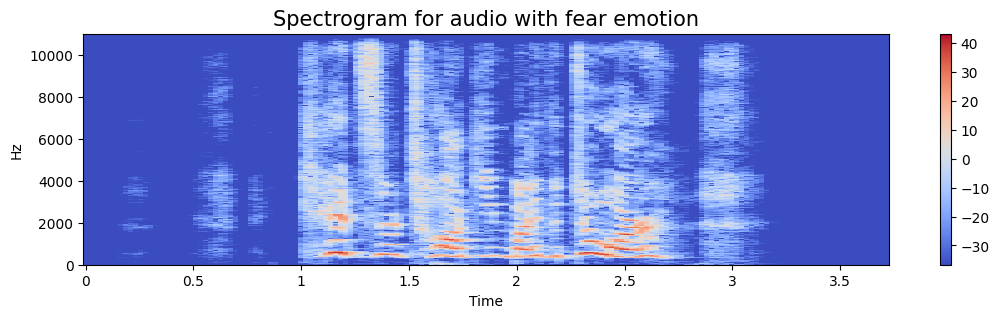

In [17]:
display_the_plots('fear')

2. Angry

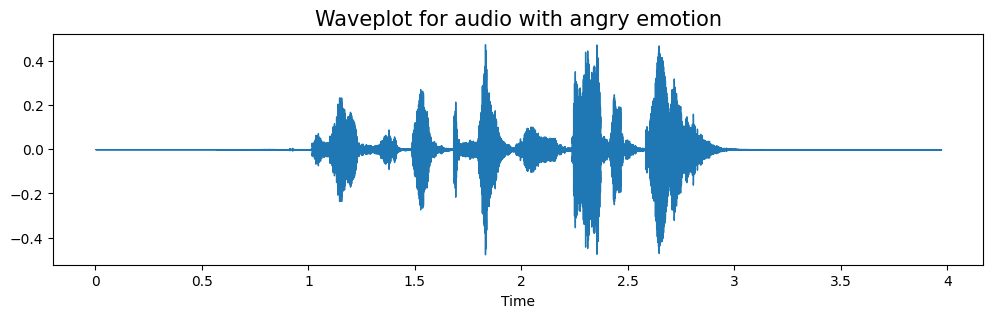

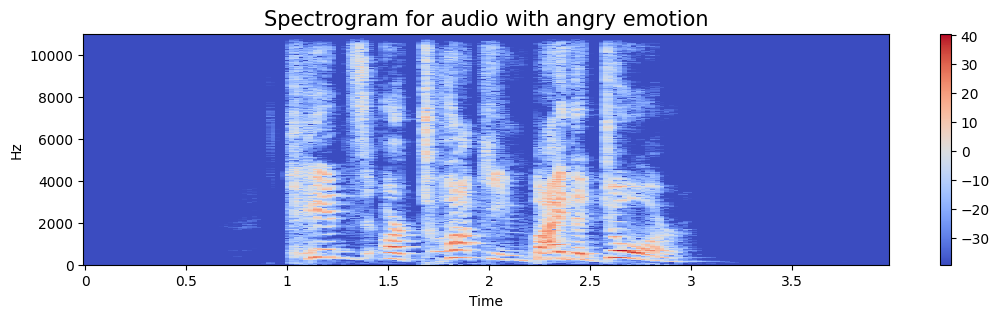

In [18]:
display_the_plots('angry')

3. Sad

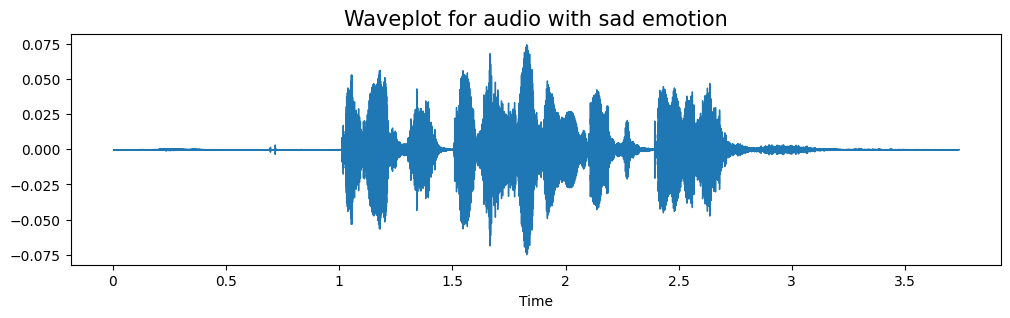

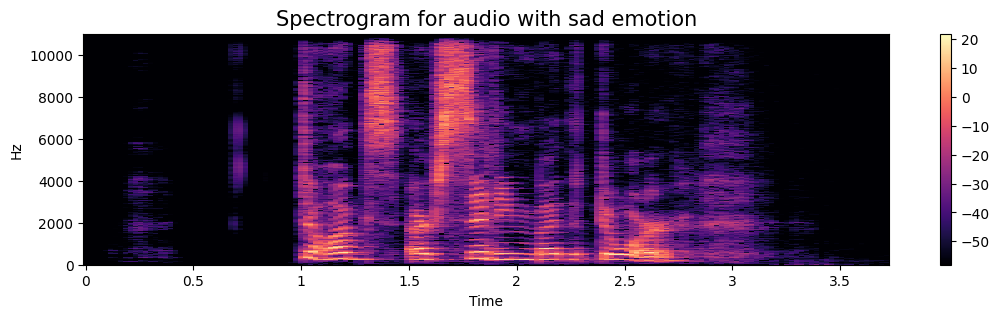

In [19]:
display_the_plots('sad')

4. Happy

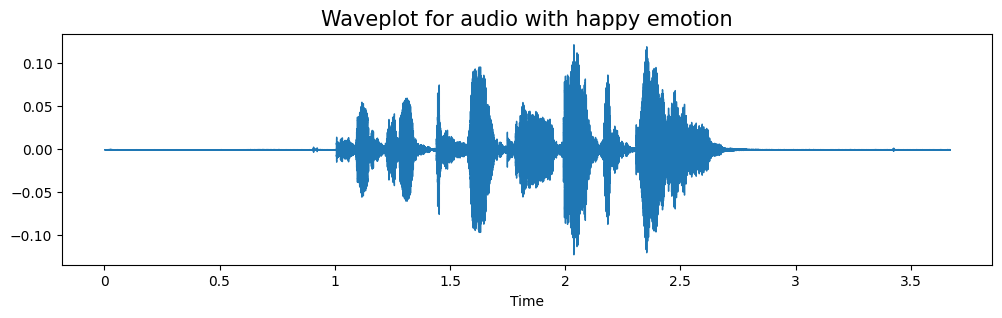

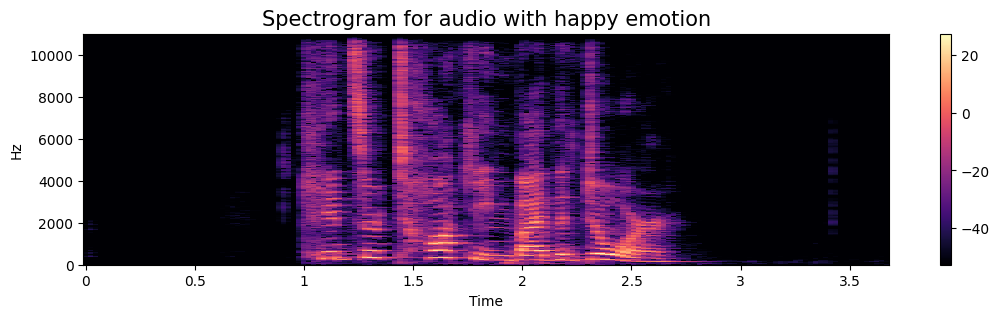

In [20]:
display_the_plots('happy')

### Data Augmentation

Trying different augmentation techniques and checking which one works best in case of our dataset

In [130]:
# Defining some data augmenting technique functions

# Noise: Adds random noise to the audio signal, simulating real-world environmental noise conditions.
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

# Stretch: Changes the duration of the audio signal by speeding it up or slowing it down without changing its pitch, which can help increase the amount of training data.
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(y=data, rate=rate)

# Shift: Shifts the audio signal along the time axis by a small amount, which can help increase the robustness of the model to small variations in timing.
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

# Pitch: Changes the pitch of the audio signal by a small amount, which can help increase the robustness of the model to variations in pitch in the input data.
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(y=data, sr=sampling_rate, n_steps=pitch_factor)

# Speed Perturbation: This technique changes the speed of the audio waveform by a certain factor, without changing the pitch
def speed_perturbation(data, rate=1.2):
    return librosa.effects.time_stretch(data, rate=rate)

# Dynamic Range Compression: This technique compresses the dynamic range of the audio waveform, making the loud parts softer and the soft parts louder
def dynamic_range_compression(data, rate=0.8):
    audio = AudioSegment(data.tobytes(), frame_rate=rate, sample_width=data.dtype.itemsize, channels=1)
    audio = compress_dynamic_range(audio)
    return np.frombuffer(audio.raw_data, dtype=data.dtype)

# Random Cropping: This technique randomly selects a segment of the audio waveform and discards the rest
def random_crop(data, length): 
    if len(data) <= length:
        return data
    start = np.random.randint(0, len(data) - length)
    end = start + length
    return data[start:end]

# Resampling: This technique changes the sampling rate of the audio waveform, which can help to reduce the computational cost of processing the data
def resample(data, orig_sr, target_sr=16000):
    return librosa.resample(data, orig_sr=orig_sr, target_sr=target_sr)

# Reverberation: This technique adds a simulated room effect to the audio waveform, which can help to make it more robust to environmental variations
def add_reverb(data, sr):
    # Generate a random impulse response for the reverb effect
    impulse_response = np.random.uniform(size=int(sr * 1.5))
    impulse_response = librosa.util.normalize(impulse_response, norm=1)

    # Apply the impulse response to the audio signal
    convolved = np.convolve(data, impulse_response)
    return convolved[:len(data)]

# Spectral Masking: This technique randomly masks a portion of the frequency spectrum of the audio waveform, which can help to make it more robust to noise
def spectral_masking(data):
    mask_start = np.random.randint(0, data.shape[0] // 2)
    mask_end = mask_start + np.random.randint(data.shape[0] // 4, data.shape[0] // 2)
    mask = np.ones_like(data)
    mask[mask_start:mask_end] = 0.0
    masked_data = np.multiply(data, mask)
    return masked_data

# Frequency Masking: This technique randomly masks a portion of the time-frequency representation of the audio waveform, which can help to make it more robust to noise
def frequency_masking(data):
    mask_start = np.random.randint(0, data.shape[0] // 2)
    mask_end = mask_start + np.random.randint(data.shape[0] // 4, data.shape[0] // 2)
    mask = np.ones_like(data)
    mask[mask_start:mask_end] = 0.0
    masked_data = np.multiply(data, mask)
    return masked_data

In [38]:
# Comparing the techniques for a specific example
path = np.array(combined_df.Path)[1]
data, sample_rate = librosa.load(path)

1. Simple Audio

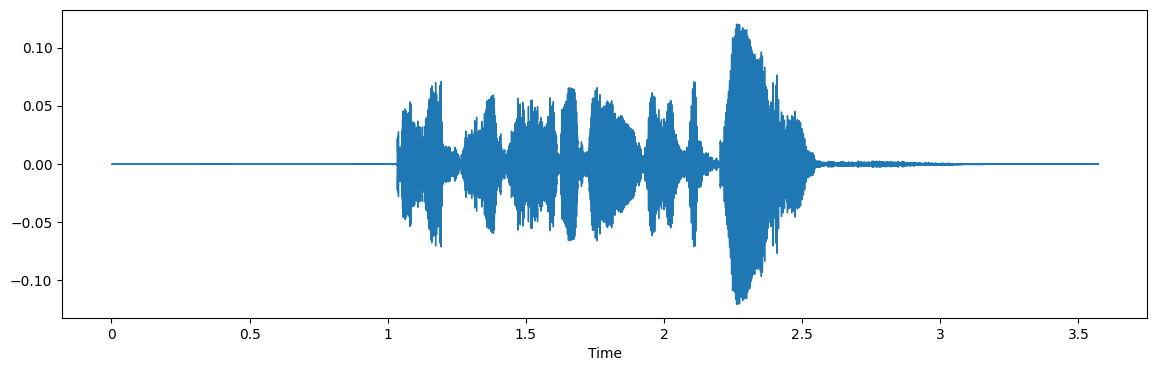

In [39]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

2. Noise Injection

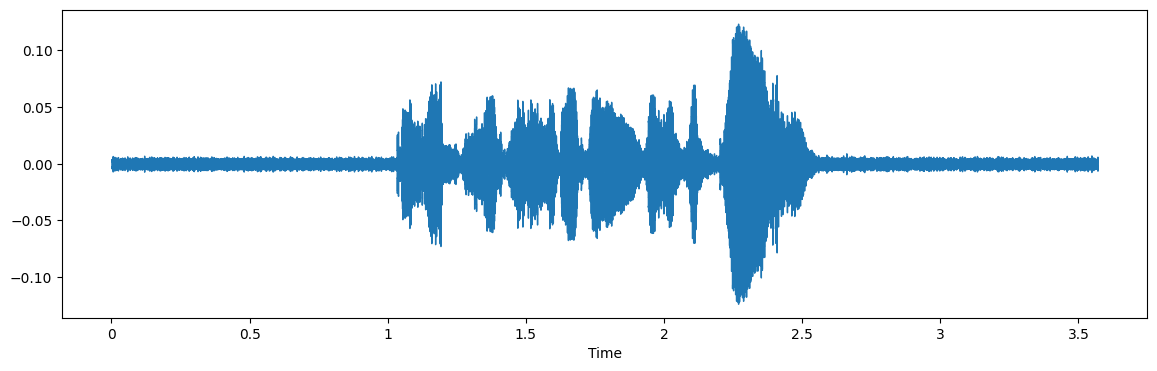

In [40]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

3. Stretching

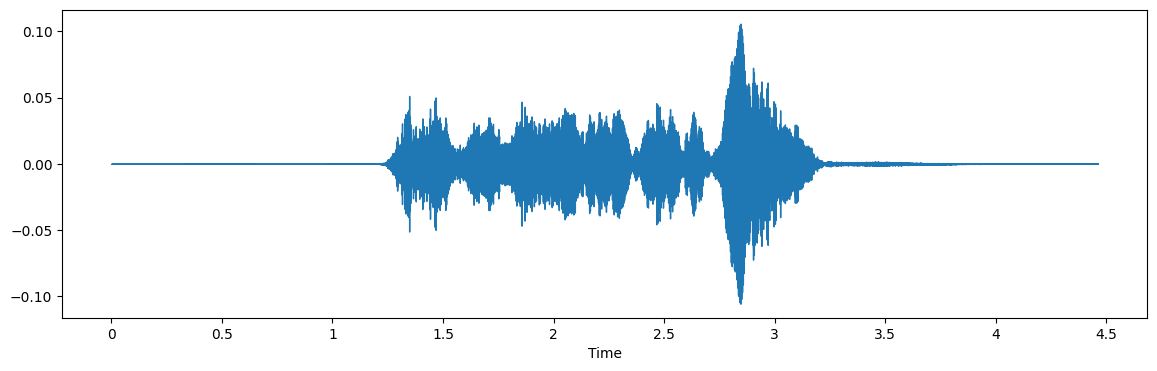

In [41]:
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

4. Shifting

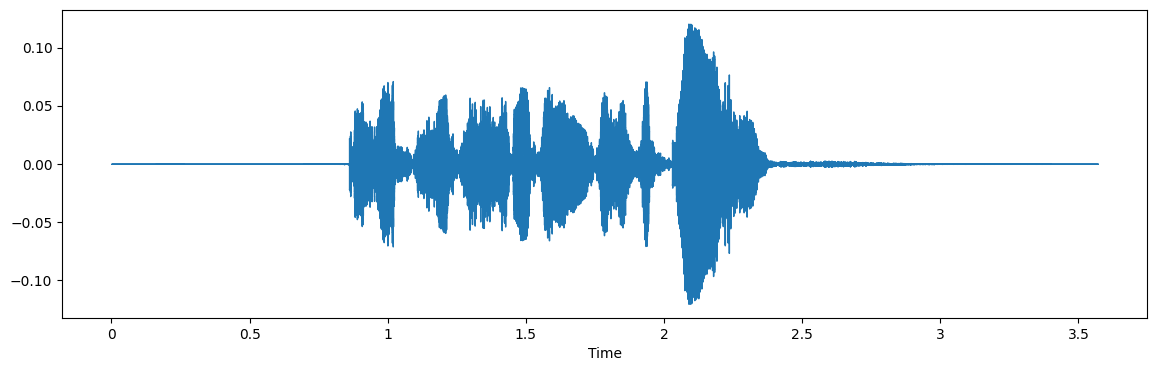

In [42]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

5. Pitch

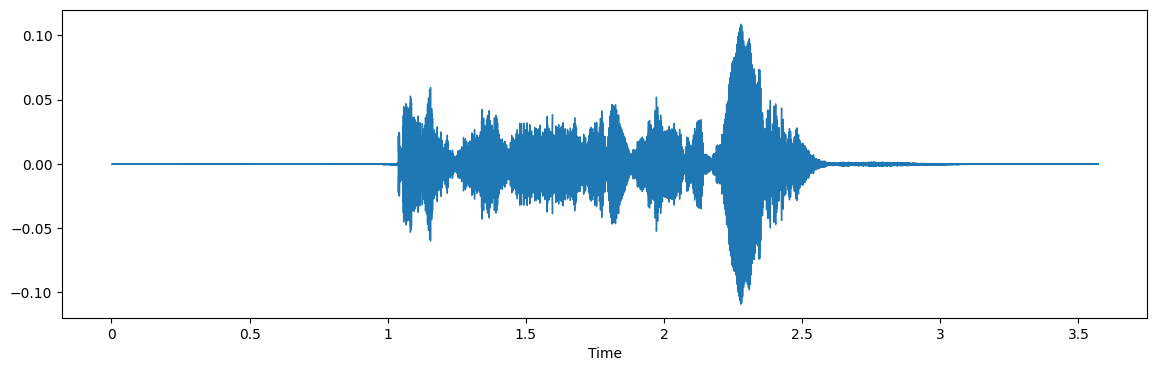

In [43]:
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

6. Speed Perturbation

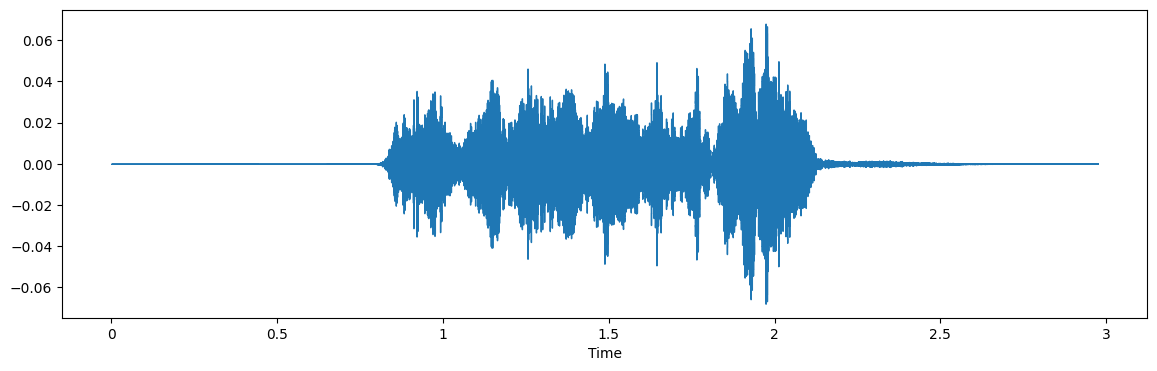

In [82]:
x = speed_perturbation(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

7. Dynamic Range Compression

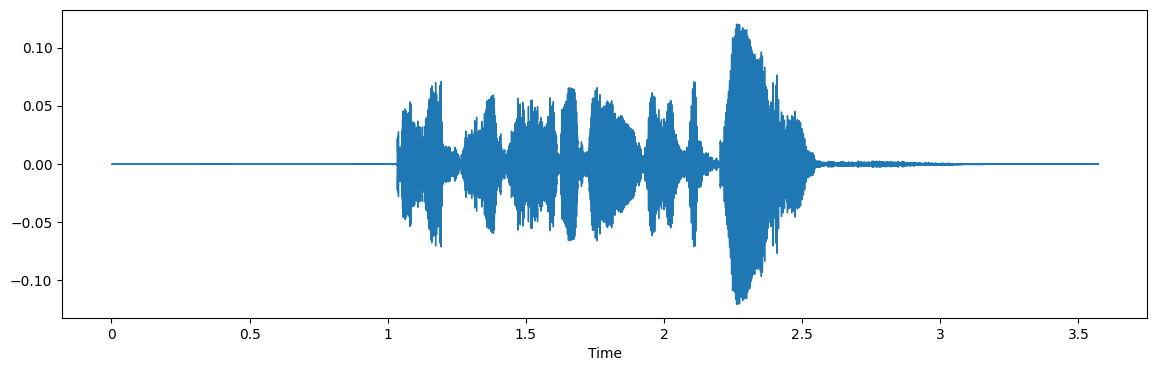

In [83]:
x = dynamic_range_compression(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

8. Random Cropping

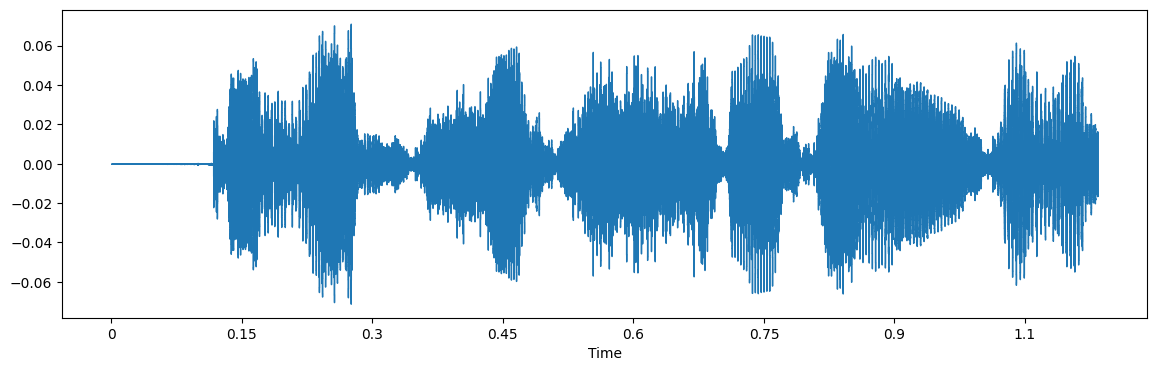

In [100]:
x = random_crop(data, 25000)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

9. Resampling

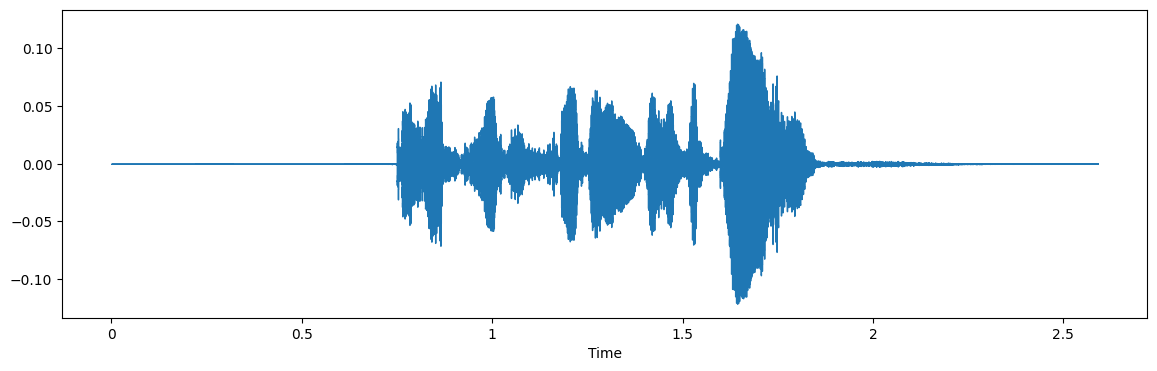

In [103]:
x = resample(data, sample_rate, target_sr=16000)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

10. Reverberation

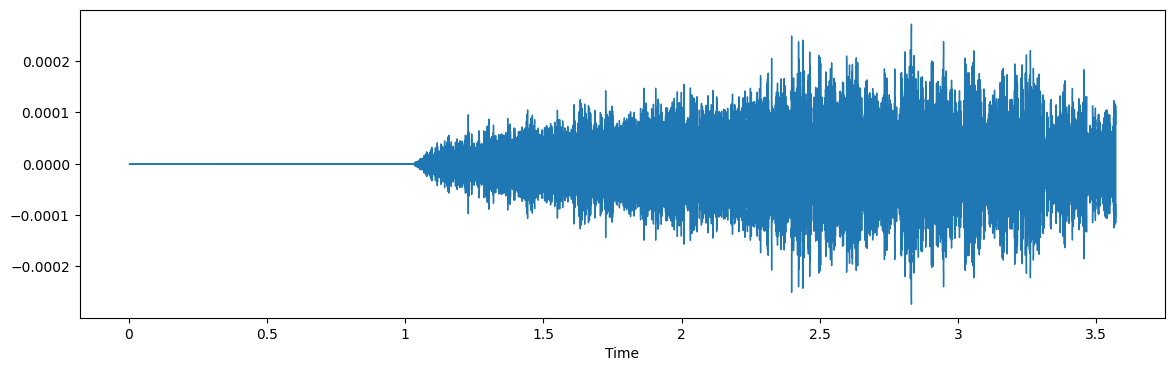

In [131]:
x = add_reverb(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

11. Spectral Masking

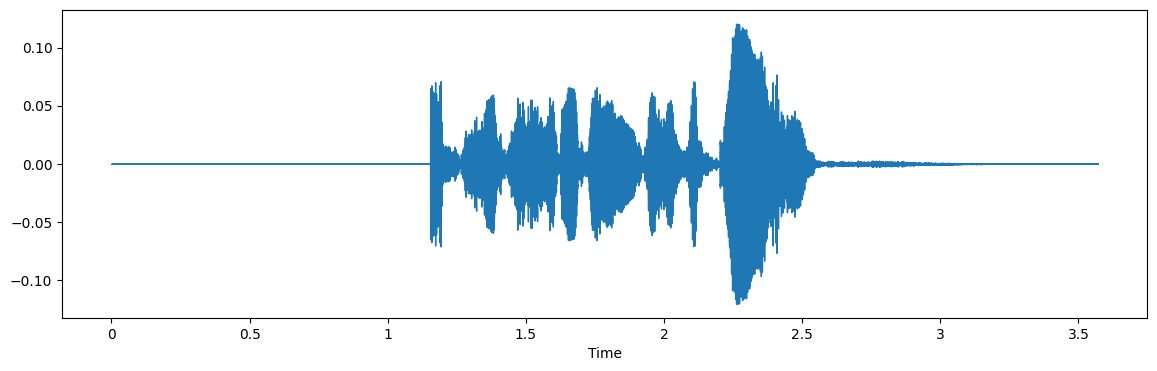

In [118]:
x = spectral_masking(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

12. Frequency Masking

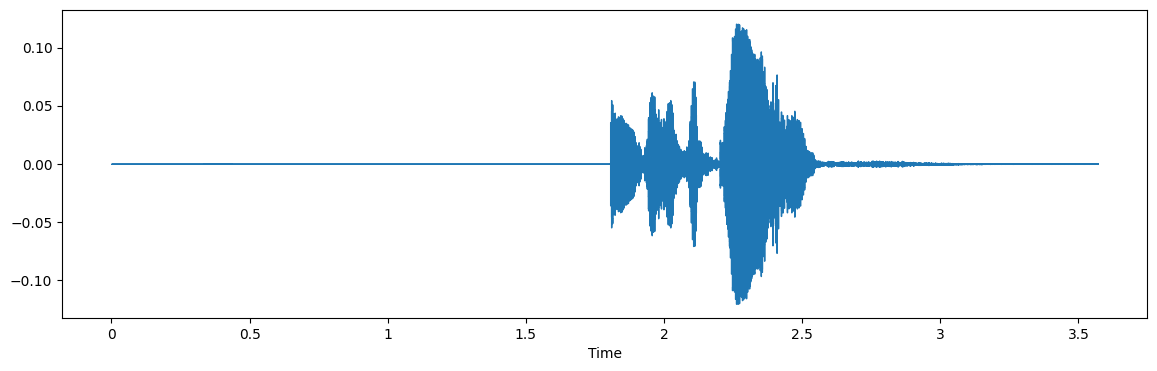

In [119]:
x = frequency_masking(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

After looking at the different augmentation techniques, we are using **noise, stretching (ie. changing speed) and some pitching**.

We are using these because of the following reasons-

1. **Noise:** Adding noise to the audio signal can simulate the presence of background noise or other unwanted sounds that might be present in real-world scenarios. This can help to make our model more robust and better able to handle noisy or imperfect input.

2. **Stretching:** Time stretching can be used to simulate changes in speech rate or tempo, which can be useful for capturing differences in emotion or affect. For example, a person who is excited or anxious might speak more quickly, while someone who is sad or depressed might speak more slowly. Stretching can also help to increase the amount of data available for training, as it effectively creates new, longer audio samples.

3. **Pitching:** Similar to stretching, changing the pitch of the audio signal can be used to simulate changes in emotion or affect. For example, a person who is angry or frustrated might speak in a lower pitch, while someone who is happy or excited might speak in a higher pitch. Pitch shifting can also be useful for creating gender-balanced datasets, as it allows you to create male or female versions of the same audio sample.

Overall, data augmentation techniques like noise, stretching, and pitching can help to increase the variety and diversity of our training data, which can improve the accuracy and generalization of our model. By using these techniques, we can create a more robust and effective speech emotion recognition system.

## Feature Extraction

In [132]:
def extract_features(data):
    features = np.array([])
    
    # Method 1 - Root Mean Square Value: This is a measure of the energy of the signal, which can be useful for detecting changes in loudness.
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    features = np.hstack((features, rms)) # Stacking horizontally

    # Method 2 - Zero Crossing Rate: This is a measure of the number of times the signal crosses the zero axis, which is useful for detecting the periodicity of the signal.
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    features=np.hstack((features, zcr)) # Stacking horizontally

    # Method 3 - Chroma_stft: This is a representation of the pitch content of a signal, which is useful for tasks such as music genre classification and chord recognition.
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    features = np.hstack((features, chroma_stft)) # Stacking horizontally

    # Method 4 - MFCC: This is a representation of the spectral envelope of a signal, which is useful for representing the timbral characteristics of the sound.
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    features = np.hstack((features, mfcc)) # Stacking horizontally

    # Method 5 - MelSpectogram: This is a spectral representation of the signal that takes into account the non-linearities of the human auditory system, and is commonly used in speech recognition and music classification tasks.
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    features = np.hstack((features, mel)) # Stacking horizontally

    # Method 6 - Spectral Centroid: The spectral centroid indicates at which frequency the energy of a spectrum is centered. It is calculated as the weighted mean of the frequencies present in the signal, with their magnitudes as the weights.
    centroids = np.mean(librosa.feature.spectral_centroid(y=data, sr=sample_rate).T, axis=0)
    features = np.hstack((features, centroids)) # Stacking horizontally

    # Method 7 - Spectral Bandwidth: The spectral bandwidth represents the width of the frequency range over which most of the signal's energy is concentrated. It is calculated as the weighted standard deviation of the frequencies present in the signal, with their magnitudes as the weights.
    bandwidths = np.mean(librosa.feature.spectral_bandwidth(y=data, sr=sample_rate).T, axis=0)
    features = np.hstack((features, bandwidths)) # Stacking horizontally

    # Method 8 - Spectral Contrast: The spectral contrast measures the difference in amplitude between peaks and valleys in the spectrum. It can be used to capture the perceptual difference between speech sounds.
    contrast = np.mean(librosa.feature.spectral_contrast(y=data, sr=sample_rate).T, axis=0)
    features = np.hstack((features, contrast)) # Stacking horizontally

    # Method 9 - Spectral Roll-off: The spectral roll-off represents the frequency below which a specified percentage of the total spectral energy lies.
    rolloff = np.mean(librosa.feature.spectral_rolloff(y=data, sr=sample_rate).T, axis=0)
    features = np.hstack((features, rolloff)) # Stacking horizontally

    # Method 10 - Tonnetz: The tonnetz is a six-dimensional representation of the tonal space in Western music theory. It can be used to capture the harmonic and melodic content of speech signals.
    tonnetz = np.mean(librosa.feature.tonnetz(y=data, sr=sample_rate).T, axis=0)
    features = np.hstack((features, tonnetz)) # Stacking horizontally

    return features

def get_features(path):
    # Duration and Offset are used to take care of the no audio in start
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # Without Augmentation
    res1 = extract_features(data)
    features = np.array(res1)
    
    # Data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    features = np.vstack((features, res2)) # Stacking vertically
    
    # Data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    features = np.vstack((features, res3)) # stacking vertically
    
    return features

In [133]:
X, Y = [], []
for path, emotion in zip(combined_df.Path, combined_df.Emotions):
    features = get_features(path)
    for ele in features:
        X.append(ele)
        # Appending emotion 3 times as we have made 3 augmentation techniques on each audio file
        Y.append(emotion)

In [134]:
print('Total Emotions:',combined_df.Path.shape)
print('X and Y: ',len(X),',', len(Y))

Total Emotions: (12379,)
X and Y:  37137 , 37137


In [135]:
Features = pd.DataFrame(X)
Features['labels'] = Y

#Saving the features dataframe
Features.to_csv('features.csv', index=False)
Features.head()

0         1         2         3         4         5         6   
0  0.018793  0.204540  0.519947  0.470245  0.491603  0.560526  0.548730  \
1  0.022184  0.360370  0.696555  0.691949  0.726056  0.743296  0.714867   
2  0.008816  0.219394  0.621704  0.513835  0.481735  0.510985  0.545469   
3  0.012744  0.189815  0.559461  0.520419  0.483768  0.438286  0.392830   
4  0.012752  0.233869  0.654289  0.621471  0.590698  0.550276  0.506973   

          7         8         9  ...        169        170          171   
0  0.611754  0.547266  0.531048  ...  19.192850  46.266764  5263.372803  \
1  0.708526  0.631378  0.660746  ...  14.800050  13.930247  8660.634359   
2  0.526371  0.618306  0.529213  ...  21.954138  50.684856  5589.700521   
3  0.401268  0.409626  0.440601  ...  20.015399  43.083978  4517.586263   
4  0.495946  0.484515  0.508857  ...  18.892603  19.775022  5559.653727   

        172       173       174       175       176       177  labels  
0 -0.020173  0.031740 -0.032860  0.007608 -0.000694 -0.019647   angry  
1 -0.012128  0.017611 -0.023857 -0.020659 -0.002013 -0.011113   angry  
2  0.007167 -0.022226 -0.007491 -0.015738 -0.019270  0.007538   angry  
3 -0.003810  0.022394 -0.024964 -0.002786 -0.008928  0.001977    fear  
4 -0.022878  0.027544 -0.020758 -0.005861 -0.004957  0.004690    fear  

[5 rows x 179 columns]

## Data Normalization

In [274]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [275]:
# As this is a multiclass classification problem, we need to onehotencod our Y
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [276]:
# Splitting data into train and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27852, 178), (27852, 8), (9285, 178), (9285, 8))

In [277]:
# Scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27852, 178), (27852, 8), (9285, 178), (9285, 8))

In [278]:
# Making our data compatible to model
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27852, 178, 1), (27852, 8), (9285, 178, 1), (9285, 8))

## Building the Models

### Model 1 - Convolutional Neural Network (CNN)

The first model we will use is a **Convolutional Neural Network (CNN)** based model for speech emotion recognition. It consists of several layers of Conv1D, MaxPooling1D, Dropout, and Dense layers.

In the CNN architecture, each layer performs a different task. The first layer takes in the raw speech data and applies a mathematical operation called a convolution to extract features from the sound. Then, a process called pooling reduces the size of the features and its spatial dimensionality.

We repeat this process a few more times, with each layer getting more complex and extracting more advanced features. We also add some Dropout layers to prevent the model from overfitting to the training data and performing poorly on new, unseen data.

Finally, we have a layer that classifies the input into one of eight possible emotions allowing the model to predict emotions that fall into either category. 

In [233]:
# Builing the CNN Model
model_CNN=Sequential()
model_CNN.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model_CNN.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model_CNN.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model_CNN.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model_CNN.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model_CNN.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model_CNN.add(Dropout(0.2))

model_CNN.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model_CNN.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model_CNN.add(Flatten())
model_CNN.add(Dense(units=32, activation='relu'))
model_CNN.add(Dropout(0.3))

model_CNN.add(Dense(units=8, activation='softmax'))
model_CNN.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model_CNN.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_60 (Conv1D)          (None, 178, 256)          1536      
                                                                 
 max_pooling1d_60 (MaxPoolin  (None, 89, 256)          0         
 g1D)                                                            
                                                                 
 conv1d_61 (Conv1D)          (None, 89, 256)           327936    
                                                                 
 max_pooling1d_61 (MaxPoolin  (None, 45, 256)          0         
 g1D)                                                            
                                                                 
 conv1d_62 (Conv1D)          (None, 45, 128)           163968    
                                                                 
 max_pooling1d_62 (MaxPoolin  (None, 23, 128)        

In [234]:
# Fitting the CNN Model
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
CNN_model_h=model_CNN.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50
436/436 [==============================] - 33s 73ms/step - loss: 1.6893 - accuracy: 0.3134 - val_loss: 1.4520 - val_accuracy: 0.4194 - lr: 0.0010
Epoch 2/50
436/436 [==============================] - 32s 74ms/step - loss: 1.4752 - accuracy: 0.4034 - val_loss: 1.3201 - val_accuracy: 0.4599 - lr: 0.0010
Epoch 3/50
436/436 [==============================] - 32s 73ms/step - loss: 1.3774 - accuracy: 0.4473 - val_loss: 1.2792 - val_accuracy: 0.4880 - lr: 0.0010
Epoch 4/50
436/436 [==============================] - 31s 72ms/step - loss: 1.3254 - accuracy: 0.4687 - val_loss: 1.2286 - val_accuracy: 0.5074 - lr: 0.0010
Epoch 5/50
436/436 [==============================] - 28s 65ms/step - loss: 1.2888 - accuracy: 0.4831 - val_loss: 1.2068 - val_accuracy: 0.5088 - lr: 0.0010
Epoch 6/50
436/436 [==============================] - 32s 73ms/step - loss: 1.2554 - accuracy: 0.4960 - val_loss: 1.1855 - val_accuracy: 0.5347 - lr: 0.0010
Epoch 7/50
436/436 [==============================] - 32s 

291/291 [==============================] - 4s 12ms/step - loss: 1.0911 - accuracy: 0.6026
Model Accuracy:  60.26 %


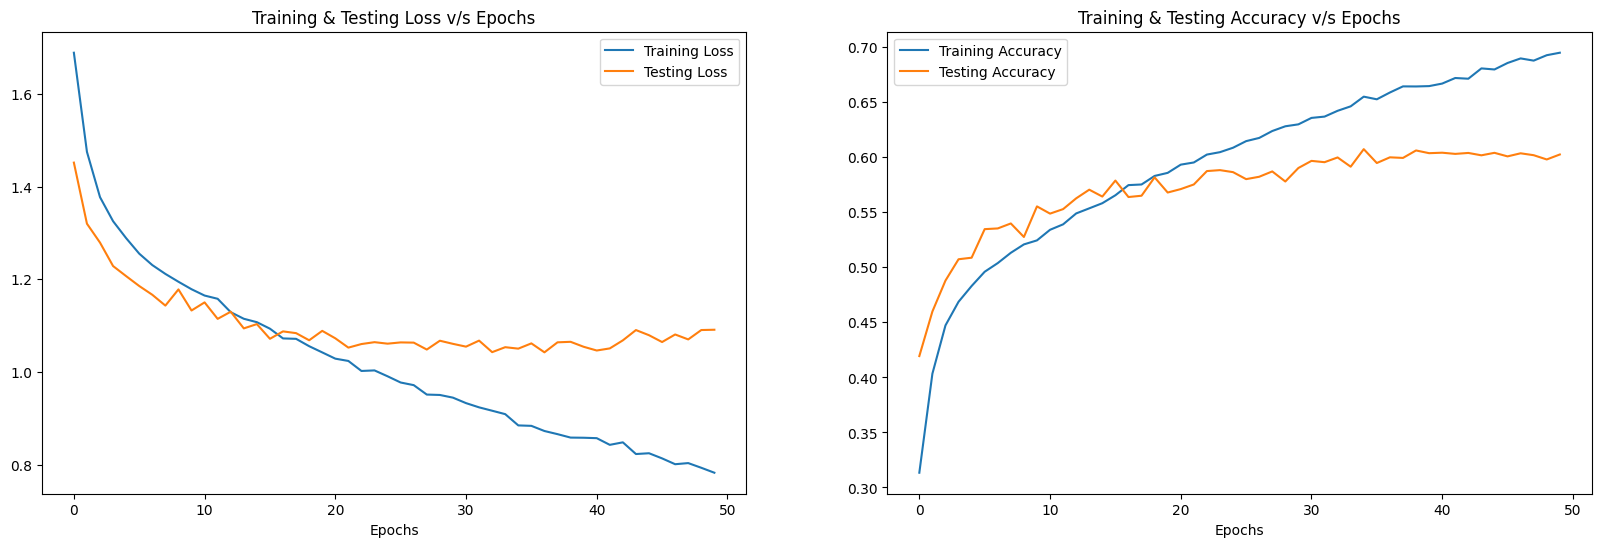

In [236]:
# CNN Model Accuracy and Plots
CNN_model_acc = model_CNN.evaluate(x_test,y_test)[1]*100
print('Model Accuracy: ', round(CNN_model_acc, 2) , '%')

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = CNN_model_h.history['accuracy']
train_loss = CNN_model_h.history['loss']
test_acc = CNN_model_h.history['val_accuracy']
test_loss = CNN_model_h.history['val_loss']
fig.set_size_inches(20,6)

ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss v/s Epochs')
ax[0].legend()
ax[0].set_xlabel('Epochs')

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy v/s Epochs')
ax[1].legend()
ax[1].set_xlabel('Epochs')

plt.show()

For **CNN Model, our Accuracy is 60.26%**. Let's try adding Batch Normalization to CNN.

Batch normalization is a commonly used technique in neural network architectures to standardize the inputs of each layer to have zero mean and unit variance. This can help improve the training process and prevent further overfitting.

In the case of convolutional neural networks (CNNs), batch normalization can be applied after each convolutional layer. This is because convolutional layers tend to produce feature maps with spatial correlations, and applying batch normalization after each convolutional layer can help to normalize these correlations.

This technique can also reduce internal covariate shift and improve the performance of the model during training. This can lead to faster convergence and better generalization performance on new data aka categorize predicted emotions accurately and faster.

### Model 2 - Convolutional Neural Network (CNN) with Batch Normalization

Model 2 is also a **Convolutional Neural Network (CNN) based model for speech emotion recognition but with Batch Normalization**. It has similar layers as Model 1, but with some important differences.

The first layer is a Conv1D layer with 256 filters of kernel size 5, stride 1, and padding 'same', just like in Model 1. However, Model 2 adds a Batch Normalization layer after each Conv1D layer. This helps improve the stability of the network and speed up training.

Next, a MaxPooling1D layer with a pool size of 5, stride of 2, and padding 'same' is added to reduce the spatial dimensions of the feature maps, just like in Model 1.

Two more Conv1D layers are added with 256 and 128 filters respectively, followed by MaxPooling1D layers with the same hyperparameters as the previous layer. A Dropout layer with a rate of 0.2 is added after the third convolutional layer to prevent overfitting, just like in Model 1.

Another Conv1D layer with 64 filters is added, followed by a MaxPooling1D layer with a pool size of 5, stride of 2, and padding 'same'.

The output of the last MaxPooling1D layer is flattened into a 1D array, and a Dense layer with 32 units and ReLU activation function is added, just like in Model 1. However, Model 2 adds another Batch Normalization layer and Dropout layer with a rate of 0.3 after the Dense layer to further improve the stability and generalization performance of the network.

Finally, a Dense layer with 8 units and softmax activation function is added as the output layer to classify the input into one of 8 possible emotions, just like in Model 1. The model is compiled with the Adam optimizer, categorical cross-entropy loss function, and accuracy metric, just like in Model 1.

In summary, Model 2 is similar to Model 1, but with the addition of Batch Normalization layers after each Conv1D layer and another Batch Normalization layer and Dropout layer after the Dense layer. These additions help improve the stability and generalization performance of the network.

In [280]:
model_CNN_BN=Sequential()
model_CNN_BN.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model_CNN_BN.add(BatchNormalization())
model_CNN_BN.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model_CNN_BN.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model_CNN_BN.add(BatchNormalization())
model_CNN_BN.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model_CNN_BN.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model_CNN_BN.add(BatchNormalization())
model_CNN_BN.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model_CNN_BN.add(Dropout(0.2))

model_CNN_BN.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model_CNN_BN.add(BatchNormalization())
model_CNN_BN.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model_CNN_BN.add(Flatten())
model_CNN_BN.add(Dense(units=32, activation='relu'))
model_CNN_BN.add(BatchNormalization())
model_CNN_BN.add(Dropout(0.3))

model_CNN_BN.add(Dense(units=8, activation='softmax'))
model_CNN_BN.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model_CNN_BN.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_64 (Conv1D)          (None, 178, 256)          1536      
                                                                 
 batch_normalization_73 (Bat  (None, 178, 256)         1024      
 chNormalization)                                                
                                                                 
 max_pooling1d_64 (MaxPoolin  (None, 89, 256)          0         
 g1D)                                                            
                                                                 
 conv1d_65 (Conv1D)          (None, 89, 256)           327936    
                                                                 
 batch_normalization_74 (Bat  (None, 89, 256)          1024      
 chNormalization)                                                
                                                     

In [281]:
rlrp_BN = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
CNN_BN_model_h = model_CNN_BN.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp_BN])

Epoch 1/50
436/436 [==============================] - 42s 93ms/step - loss: 1.6697 - accuracy: 0.3715 - val_loss: 3.5469 - val_accuracy: 0.2442 - lr: 0.0010
Epoch 2/50
436/436 [==============================] - 39s 90ms/step - loss: 1.3764 - accuracy: 0.4620 - val_loss: 1.7594 - val_accuracy: 0.3982 - lr: 0.0010
Epoch 3/50
436/436 [==============================] - 39s 90ms/step - loss: 1.2872 - accuracy: 0.4978 - val_loss: 1.2712 - val_accuracy: 0.5142 - lr: 0.0010
Epoch 4/50
436/436 [==============================] - 39s 90ms/step - loss: 1.2416 - accuracy: 0.5151 - val_loss: 1.1964 - val_accuracy: 0.5352 - lr: 0.0010
Epoch 5/50
436/436 [==============================] - 39s 89ms/step - loss: 1.2076 - accuracy: 0.5294 - val_loss: 1.5175 - val_accuracy: 0.4440 - lr: 0.0010
Epoch 6/50
436/436 [==============================] - 37s 85ms/step - loss: 1.1731 - accuracy: 0.5427 - val_loss: 1.2966 - val_accuracy: 0.4949 - lr: 0.0010
Epoch 7/50
436/436 [==============================] - 37s 

291/291 [==============================] - 4s 13ms/step - loss: 1.2371 - accuracy: 0.6266
Model Accuracy:  62.66 %


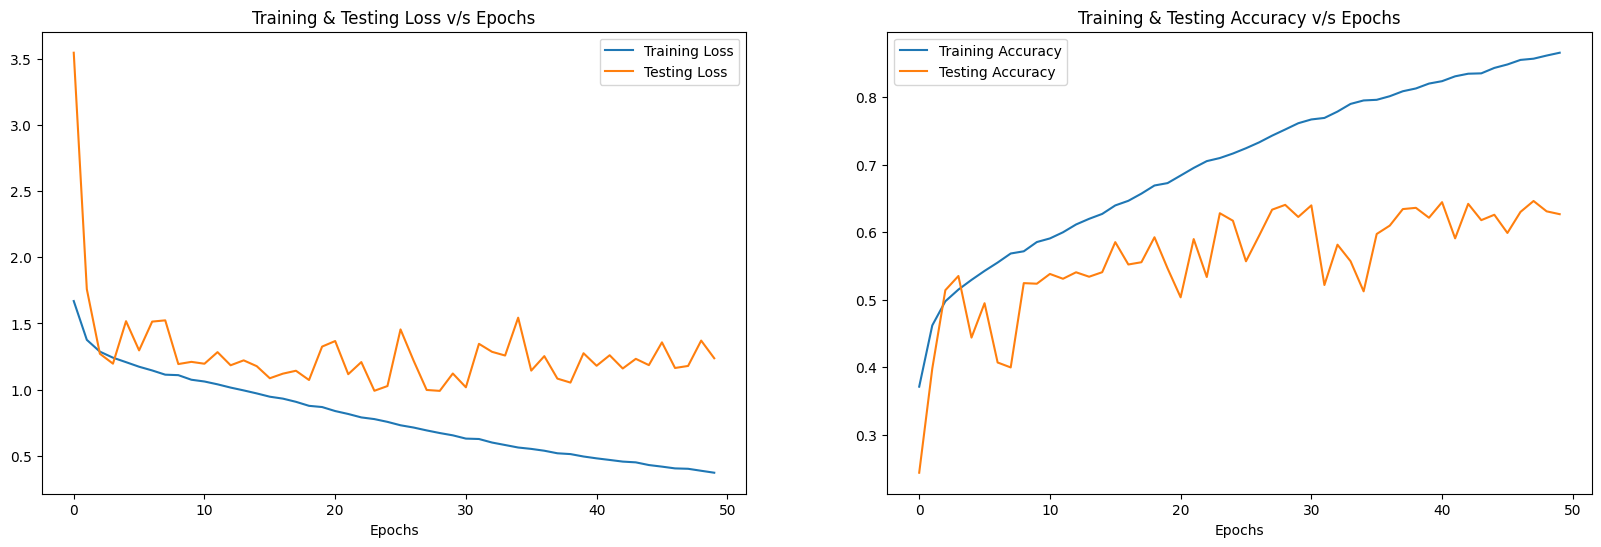

In [282]:
CNN_model_acc = model_CNN_BN.evaluate(x_test,y_test)[1]*100
print('Model Accuracy: ', round(CNN_model_acc, 2) , '%')

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = CNN_BN_model_h.history['accuracy']
train_loss = CNN_BN_model_h.history['loss']
test_acc = CNN_BN_model_h.history['val_accuracy']
test_loss = CNN_BN_model_h.history['val_loss']
fig.set_size_inches(20,6)

ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss v/s Epochs')
ax[0].legend()
ax[0].set_xlabel('Epochs')

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy v/s Epochs')
ax[1].legend()
ax[1].set_xlabel('Epochs')

plt.show()

For **CNN Model with Batch Normalization, our Accuracy increased to 62.66%**. Batch Normalization increased the accuracy of our model.

Let's try one Recurrent Neural Network (RNN) model, we will use Long Short-Term Memory (LSTM) Model.

The reason for using an LSTM model (a type of RNN) after a CNN model for speech emotion recognition is because LSTMs are particularly useful for modeling sequential data, such as speech signals, by capturing long-term temporal dependencies.

CNNs are good at extracting local and short-term features from the input data, while LSTMs excel at capturing the longer-term temporal dynamics of the data. By combining the two models, the CNN can extract local features from the speech signals, and the LSTM can learn to capture the longer-term patterns in the data.

This approach has been shown to be effective for speech emotion recognition tasks, as it allows the model to capture both short-term and long-term variations in the speech signals, leading to improved performance compared to using either CNN or LSTM alone.

### Model 3 - Long Short-Term Memory (LSTM) Model

The next model used in the speech emotion recognition project is a **Long Short-Term Memory (LSTM)** model. The model consists of several LSTM layers and a dense layer.

The input to the model is a sequence of speech data with shape (x_train.shape[1], 1). The first layer is an LSTM layer with 128 units and return_sequences set to True, which allows the model to output a sequence rather than just a single output value. A dropout layer is added after the LSTM layer with a dropout rate of 0.2 to prevent overfitting.

Another LSTM layer with 64 units and return_sequences set to True is added, followed by another Dropout layer with the same dropout rate. A third LSTM layer with 32 units and no return sequence is added, followed by another Dropout layer.

Finally, a Dense layer with 8 units and softmax activation function is added as the output layer to classify the input into one of 8 possible emotions. The model is compiled with the Adam optimizer, categorical cross-entropy loss function, and accuracy metric.

In summary, the LSTM model is designed to capture the temporal dependencies in speech data and classify the input into one of 8 possible emotions. The use of dropout layers helps prevent overfitting and improve the model's generalization performance.

In [288]:
model_LSTM = Sequential()

model_LSTM.add(LSTM(units=128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model_LSTM.add(Dropout(0.2))

model_LSTM.add(LSTM(units=64, return_sequences=True))
model_LSTM.add(Dropout(0.2))

model_LSTM.add(LSTM(units=32))
model_LSTM.add(Dropout(0.2))

model_LSTM.add(Dense(units=8, activation='softmax'))

model_LSTM.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_LSTM.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 178, 128)          66560     
                                                                 
 dropout_48 (Dropout)        (None, 178, 128)          0         
                                                                 
 lstm_4 (LSTM)               (None, 178, 64)           49408     
                                                                 
 dropout_49 (Dropout)        (None, 178, 64)           0         
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_50 (Dropout)        (None, 32)                0         
                                                                 
 dense_66 (Dense)            (None, 8)               

In [289]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
LSTM_model_h = model_LSTM.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50
436/436 [==============================] - 128s 289ms/step - loss: 1.8061 - accuracy: 0.2638 - val_loss: 1.7877 - val_accuracy: 0.2643 - lr: 0.0010
Epoch 2/50
436/436 [==============================] - 123s 282ms/step - loss: 1.6660 - accuracy: 0.3228 - val_loss: 1.5994 - val_accuracy: 0.3496 - lr: 0.0010
Epoch 3/50
436/436 [==============================] - 118s 272ms/step - loss: 1.6129 - accuracy: 0.3474 - val_loss: 1.5455 - val_accuracy: 0.3813 - lr: 0.0010
Epoch 4/50
436/436 [==============================] - 118s 271ms/step - loss: 1.5584 - accuracy: 0.3735 - val_loss: 1.5440 - val_accuracy: 0.3729 - lr: 0.0010
Epoch 5/50
436/436 [==============================] - 121s 277ms/step - loss: 1.5301 - accuracy: 0.3825 - val_loss: 1.5093 - val_accuracy: 0.3904 - lr: 0.0010
Epoch 6/50
436/436 [==============================] - 119s 274ms/step - loss: 1.4965 - accuracy: 0.3993 - val_loss: 1.4729 - val_accuracy: 0.4067 - lr: 0.0010
Epoch 7/50
436/436 [==========================

291/291 [==============================] - 13s 46ms/step - loss: 1.1617 - accuracy: 0.5432
Model Accuracy:  54.32 %


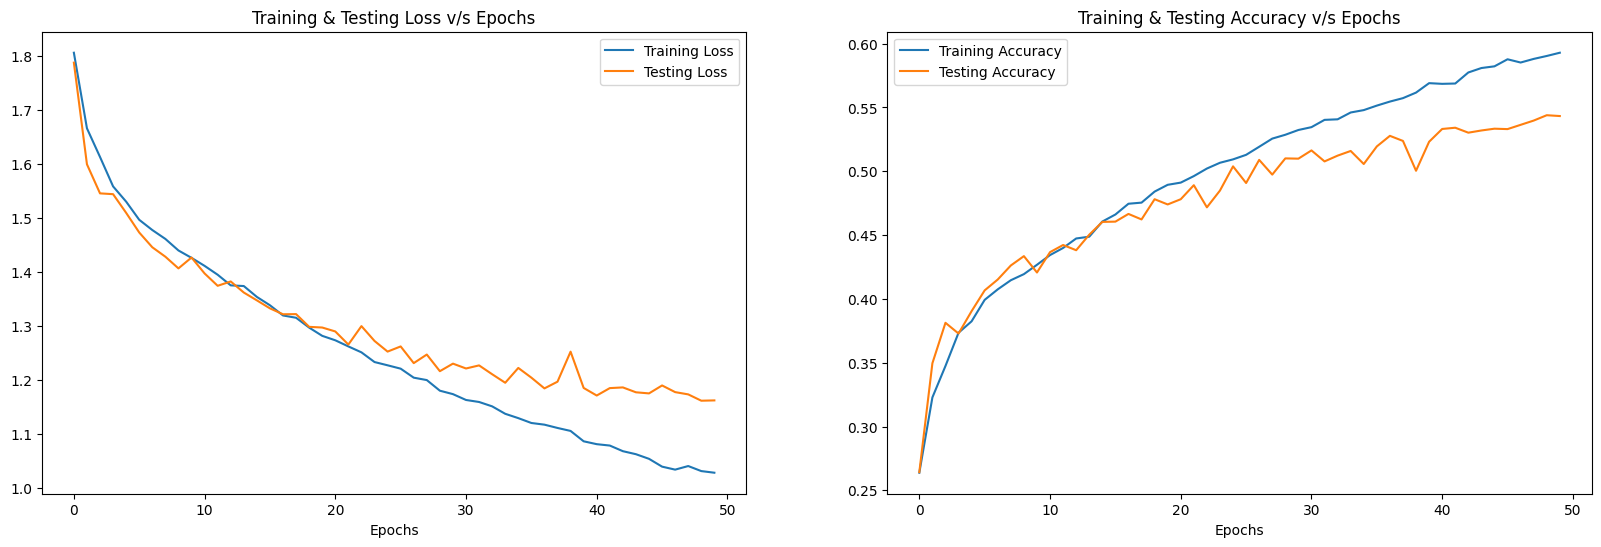

In [290]:
LSTM_model_acc = model_LSTM.evaluate(x_test,y_test)[1]*100
print('Model Accuracy: ', round(LSTM_model_acc, 2) , '%')

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = LSTM_model_h.history['accuracy']
train_loss = LSTM_model_h.history['loss']
test_acc = LSTM_model_h.history['val_accuracy']
test_loss = LSTM_model_h.history['val_loss']
fig.set_size_inches(20,6)

ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss v/s Epochs')
ax[0].legend()
ax[0].set_xlabel('Epochs')

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy v/s Epochs')
ax[1].legend()
ax[1].set_xlabel('Epochs')

plt.show()

For **LSTM Model, our Accuracy is 54.32%**.

Let's try to use **CNN along with RNN i.e. CRNN**

We use a CRNN (Convolutional Recurrent Neural Network) after a CNN with batch normalization because it allows us to extract both spatial and temporal features from the input data.

In speech emotion recognition, the temporal information of the speech signal is important as the emotions are expressed through changes in pitch, tone, and intensity over time. A CNN can extract spatial features from the speech signal by convolving filters over the time dimension, but it does not directly take into account the temporal information.

On the other hand, a CRNN combines the strengths of both CNNs and RNNs by using a CNN to extract spatial features and a recurrent layer (in this case, LSTM) to capture temporal dependencies between the features. By using batch normalization after each convolutional layer, we can normalize the output feature maps and improve the stability and speed of training.

Overall, using a CRNN with batch normalization after a CNN allows us to extract both spatial and temporal features from the speech signal, which is important for accurately recognizing emotions in speech.

### Model 4 - Convolutional Recurrent Neural Network (CRNN)

Model 4 is a **Convolutional Recurrent Neural Network (CRNN)** based model for speech emotion recognition. It consists of several layers of Conv1D, MaxPooling1D, BatchNormalization, LSTM, Flatten, Dropout, and Dense layers.

The first layer is a Conv1D layer with 64 filters of kernel size 3, stride 1, and padding 'valid'. It uses the Rectified Linear Unit (ReLU) activation function to introduce non-linearity to the network. The input shape is defined as (x_train.shape[1], 1), which is the shape of the training data.

Next, a MaxPooling1D layer with a pool size of 2, stride of 2, and padding 'valid' is added to reduce the spatial dimensions of the feature maps.

Two more Conv1D layers are added with 128 and 256 filters respectively, followed by MaxPooling1D layers with the same hyperparameters as the previous layer. A BatchNormalization layer is added after each convolutional layer to normalize the activations of the previous layer and improve the model's generalization performance as indicated earlier in the notebook.

A Long Short-Term Memory (LSTM) layer with 128 units and 'tanh' activation function is added, followed by a Dropout layer with a rate of 0.5 to prevent overfitting. The LSTM layer is set to return sequences as the input for the next layer.

The output of the LSTM layer is then flattened into a 1D array, and a Dense layer with 64 units and ReLU activation function is added. Another BatchNormalization layer is added to normalize the activations of the previous layer, followed by a Dropout layer with a rate of 0.5 to further prevent overfitting.

Finally, a Dense layer with 8 units and softmax activation function is added as the output layer to classify the input into one of 8 possible emotions. The model is compiled with the Adam optimizer, categorical cross-entropy loss function, and accuracy metric.

In [284]:
model_CRNN = Sequential()
model_CRNN.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], 1)))
model_CRNN.add(MaxPooling1D(pool_size=2))
model_CRNN.add(BatchNormalization())

model_CRNN.add(Conv1D(128, kernel_size=3, activation='relu'))
model_CRNN.add(MaxPooling1D(pool_size=2))
model_CRNN.add(BatchNormalization())

model_CRNN.add(Conv1D(256, kernel_size=3, activation='relu'))
model_CRNN.add(MaxPooling1D(pool_size=2))
model_CRNN.add(BatchNormalization())

model_CRNN.add(LSTM(128, activation='tanh', return_sequences=True))
model_CRNN.add(Dropout(0.5))

model_CRNN.add(Flatten())
model_CRNN.add(Dense(64, activation='relu'))
model_CRNN.add(BatchNormalization())
model_CRNN.add(Dropout(0.5))

model_CRNN.add(Dense(8, activation='softmax'))
model_CRNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_CRNN.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_68 (Conv1D)          (None, 176, 64)           256       
                                                                 
 max_pooling1d_68 (MaxPoolin  (None, 88, 64)           0         
 g1D)                                                            
                                                                 
 batch_normalization_78 (Bat  (None, 88, 64)           256       
 chNormalization)                                                
                                                                 
 conv1d_69 (Conv1D)          (None, 86, 128)           24704     
                                                                 
 max_pooling1d_69 (MaxPoolin  (None, 43, 128)          0         
 g1D)                                                            
                                                     

In [285]:
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)
CRNN_model_h = model_CRNN.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50
871/871 [==============================] - 35s 39ms/step - loss: 1.6900 - accuracy: 0.3755 - val_loss: 1.3121 - val_accuracy: 0.4937 - lr: 0.0010
Epoch 2/50
871/871 [==============================] - 34s 40ms/step - loss: 1.3515 - accuracy: 0.4809 - val_loss: 1.2454 - val_accuracy: 0.5108 - lr: 0.0010
Epoch 3/50
871/871 [==============================] - 32s 37ms/step - loss: 1.2487 - accuracy: 0.5230 - val_loss: 1.1593 - val_accuracy: 0.5560 - lr: 0.0010
Epoch 4/50
871/871 [==============================] - 33s 38ms/step - loss: 1.1814 - accuracy: 0.5523 - val_loss: 1.0860 - val_accuracy: 0.5793 - lr: 0.0010
Epoch 5/50
871/871 [==============================] - 31s 36ms/step - loss: 1.1182 - accuracy: 0.5755 - val_loss: 1.2477 - val_accuracy: 0.5050 - lr: 0.0010
Epoch 6/50
871/871 [==============================] - 32s 37ms/step - loss: 1.0758 - accuracy: 0.5972 - val_loss: 1.0816 - val_accuracy: 0.5774 - lr: 0.0010
Epoch 7/50
871/871 [==============================] - 33s 

291/291 [==============================] - 3s 9ms/step - loss: 1.1428 - accuracy: 0.6461
Model Accuracy:  64.61 %


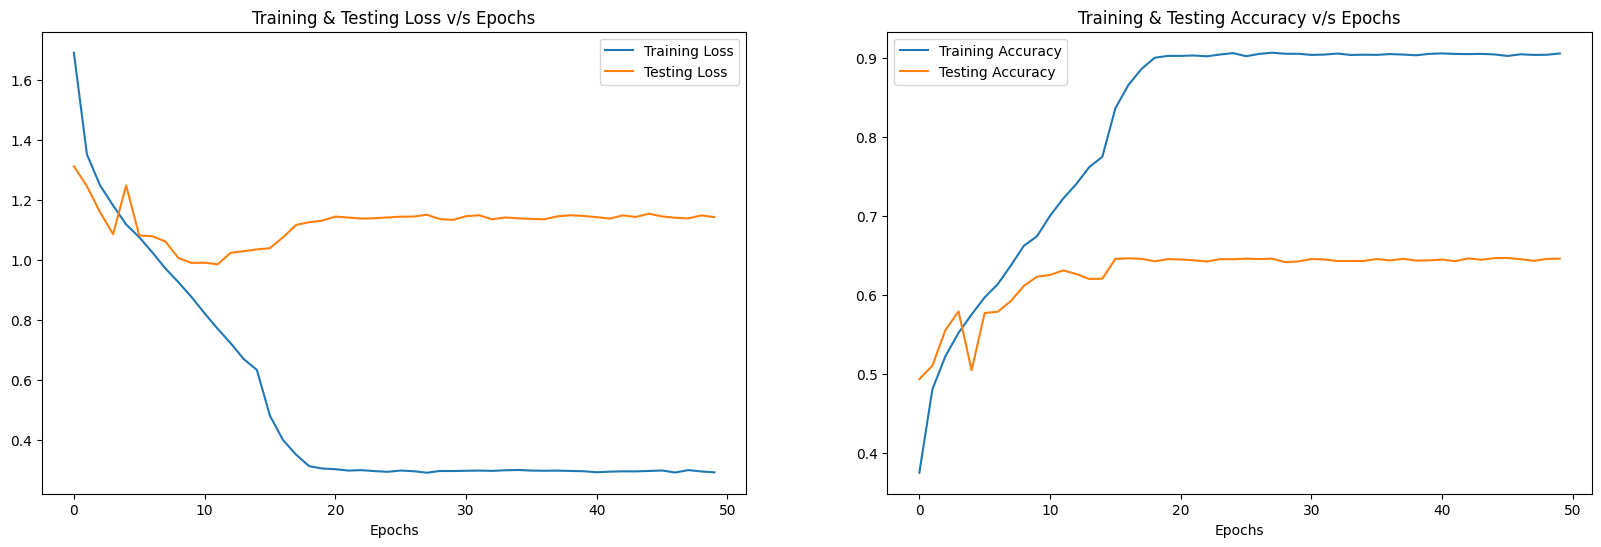

In [286]:
CRNN_model_acc = model_CRNN.evaluate(x_test,y_test)[1]*100
print('Model Accuracy: ', round(CRNN_model_acc, 2) , '%')

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = CRNN_model_h.history['accuracy']
train_loss = CRNN_model_h.history['loss']
test_acc = CRNN_model_h.history['val_accuracy']
test_loss = CRNN_model_h.history['val_loss']
fig.set_size_inches(20,6)

ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss v/s Epochs')
ax[0].legend()
ax[0].set_xlabel('Epochs')

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy v/s Epochs')
ax[1].legend()
ax[1].set_xlabel('Epochs')

plt.show()

For **CRNN Model, our Accuracy further increased to 64.61%**.

CRNN extracts both spatial and temporal features from the speech signal, which is important for accurately recognizing emotions in speech. That is the reason why the accuracy is increased for this model.

With the data we have gathered, CRNN yielded the heighest accuracy rate so we are are using this model for our Model Prediction.

## Model Prediction

In [294]:
pred_test = model_CRNN.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)
y_test = encoder.inverse_transform(y_test)

291/291 [==============================] - 3s 8ms/step


In [295]:
prediction_df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
prediction_df['Predicted Labels'] = y_pred.flatten()
prediction_df['Actual Labels'] = y_test.flatten()

prediction_df.head(10)

Predicted Labels Actual Labels
0          disgust       disgust
1          disgust       neutral
2            happy       neutral
3          disgust       disgust
4              sad           sad
5          disgust         happy
6              sad           sad
7            happy         happy
8            angry         angry
9            angry         angry

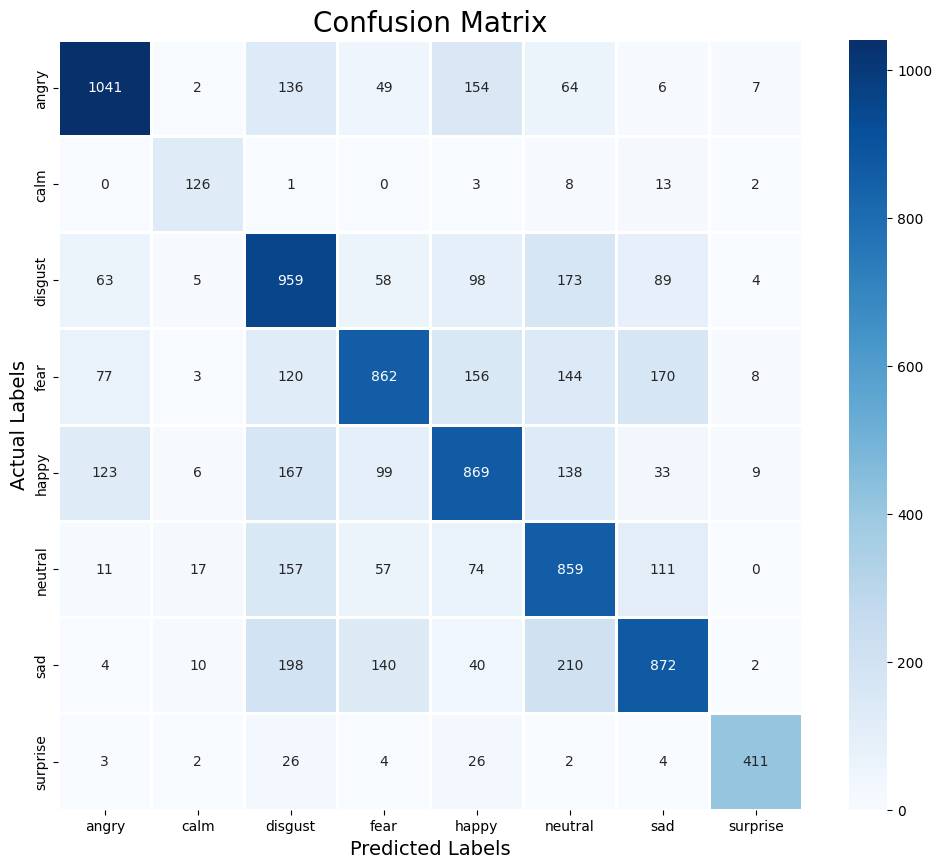

In [296]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [297]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.79      0.71      0.75      1459
        calm       0.74      0.82      0.78       153
     disgust       0.54      0.66      0.60      1449
        fear       0.68      0.56      0.61      1540
       happy       0.61      0.60      0.61      1444
     neutral       0.54      0.67      0.60      1286
         sad       0.67      0.59      0.63      1476
    surprise       0.93      0.86      0.89       478

    accuracy                           0.65      9285
   macro avg       0.69      0.68      0.68      9285
weighted avg       0.66      0.65      0.65      9285



Our model is more accurate in predicting surprise, angry emotions.
It is because because audio files of these emotions differ to other audio files in a lot of ways like pitch, speed etc.

Our model's overall Accuracy is **64.61%**.
This is decent but we can improve it by applying better augmentation techniques, using other feature extraction methods, and also try another models like SVM, GMM, or Random Forest.